In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import time

In [3]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
df_input = pd.read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V_std", usecols=[1,2,3,4,5,6])

In [6]:
df_output = pd. read_csv("CD3D_100-150℃_0.2-1.6mm_0.4-0.9V", usecols=[7])

In [7]:
df_input.shape #0.45V20℃1.5ms1.6mmと0.65V130℃1.5ms1.6mmのデータなし

(5910000, 6)

In [8]:
df_output.shape

(5910000, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [10]:
print(x_train.shape,x_test.shape)

(5319000, 6) (591000, 6)


In [11]:
x_train

,x座標,y座標,z座標,V[V],T_cell[℃],W_ch[mm]
3442285,-1.299222,-0.783800,-0.310973,-0.315428,0.288147,-0.261005
3553278,0.102587,-0.063361,-0.558638,0.946285,0.288147,-0.261005
633342,0.853556,-1.584075,-0.392238,1.577141,-1.467472,-0.261005
1505247,-1.098964,0.954884,-0.383209,0.630856,-0.882266,-0.261005
865126,-0.573285,-0.126724,-1.072025,0.630856,-1.467472,1.345807
...,...,...,...,...,...,...
2249467,-0.210317,0.380180,1.413648,0.946285,-0.297059,-1.064411
5157699,-0.327134,-1.584075,1.479434,0.315428,1.458560,-1.064411
2215104,-1.161545,-0.902605,1.671632,1.261713,-0.297059,-1.064411
1484405,0.377942,0.570270,-0.303234,-0.315428,-0.882266,-0.261005


In [12]:
y_train

,i[A/m^2]
3442285,12995.531686
3553278,3055.575745
633342,112.443434
1505247,3336.692384
865126,2012.825255
...,...
2249467,2625.451201
5157699,10222.695302
2215104,1338.378940
1484405,8674.221463


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(6,), activation='relu'))  
model.add(Dense(units=10, activation='relu'))  #
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_absolute_error',    
              optimizer='adam',             #とりあえずadamで
              metrics=['mae'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [14]:
start_time = time.time()
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001) #最初は0.001だった
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mae",
                                              patience=5, #20→5
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])
end_time = time.time()
elapsed_time = end_time - start_time   #経過時間を計算して表示
print(f"計算にかかった時間: {elapsed_time}秒")

Epoch 1/20000
26595/26595 [==============================] - 40s 1ms/step - loss: 765.3643 - mae: 765.3643 - val_loss: 315.1161 - val_mae: 315.1161 - lr: 0.0010
Epoch 2/20000
26595/26595 [==============================] - 42s 2ms/step - loss: 202.2845 - mae: 202.2845 - val_loss: 132.6764 - val_mae: 132.6764 - lr: 0.0010
Epoch 3/20000
26595/26595 [==============================] - 40s 2ms/step - loss: 122.1703 - mae: 122.1703 - val_loss: 116.1457 - val_mae: 116.1457 - lr: 0.0010
Epoch 4/20000
26595/26595 [==============================] - 39s 1ms/step - loss: 111.3279 - mae: 111.3279 - val_loss: 107.6111 - val_mae: 107.6111 - lr: 0.0010
Epoch 5/20000
26595/26595 [==============================] - 39s 1ms/step - loss: 105.2151 - mae: 105.2151 - val_loss: 109.9017 - val_mae: 109.9017 - lr: 0.0010
Epoch 6/20000
26595/26595 [==============================] - 39s 1ms/step - loss: 100.8389 - mae: 100.8389 - val_loss: 97.7269 - val_mae: 97.7269 - lr: 0.0010
Epoch 7/20000
26595/26595 [=========

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

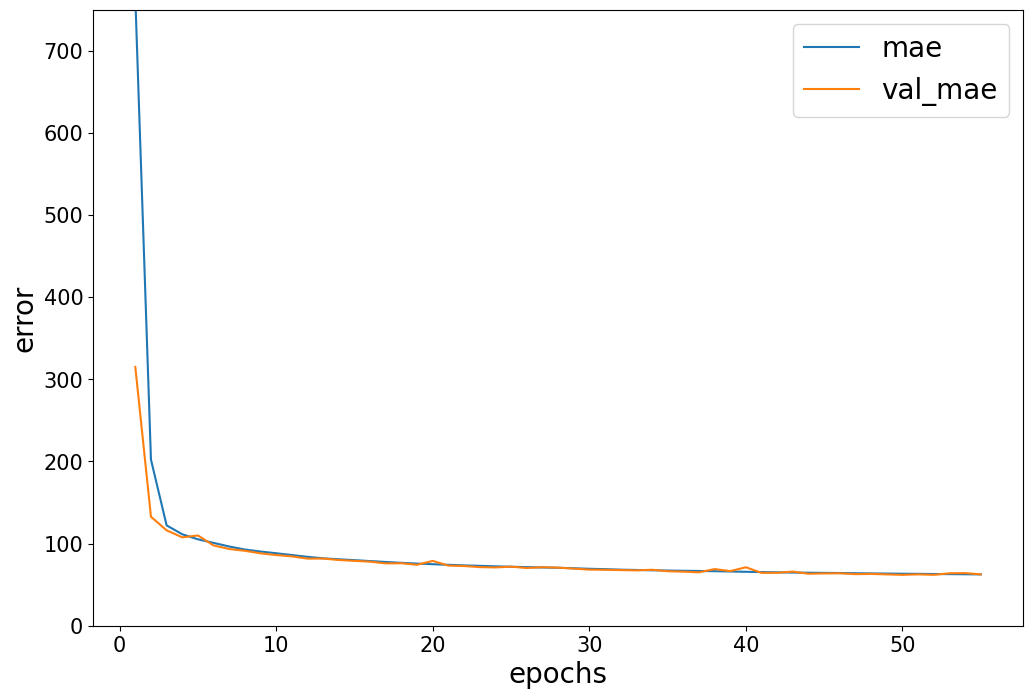

In [16]:
mae = history_dict['mae']
val_mse = history_dict['val_mae']
epochs = range(1, len(mae) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mae, label='mae')
plt.plot(epochs, val_mse, label='val_mae')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,750))
plt.legend(loc = 'best',fontsize=20)
#plt.savefig('mae_transition.png')
plt.show()

In [17]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [18]:
model.save('i_predict CD_3Ddist2')

INFO:tensorflow:Assets written to: i_predict CD_3Ddist2\assets


In [19]:
import shap

ModuleNotFoundError: No module named 'shap'

In [ ]:
# SHAPの準備
explainer = shap.Explainer(model, x_train)

# SHAP値の計算
shap_values = explainer(x_train)

# SHAP値をプロットする
shap.summary_plot(shap_values, x_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
# 部分依存プロットを計算する
# feature_idxは目的の特徴量のインデックス、ここでは 0 と仮定しています
# もし複数の特徴量を調べたい場合は、feature_idx=[0, 1, ...] のようにインデックスを指定します
partial_dependence(model, x_train, features=['x座標','y座標','z座標','V[V]','T_cell[℃]','W_ch[mm]'])
